### Exercise

An estimate of the age of the Universe is given by
$t(a) = \int_0^a \frac{da'}{a' H(a')}$

where $a$ is the scale factor and $H(a)$ is the Hubble rate. In Universe filled with radiation, non realtivistic matter, dark energy and curvature, , we can write H(a) as:

$ H(a) = H_0 \sqrt{(\Omega_R a^{-4} + \Omega_m a^{-3} + \Omega_K a^{-2} + \Omega_{\Lambda})}$,

where $\Omega_\Lambda$ is the vacuum energy density (after matter domination, $\Omega_R = 4.1 \cdot 10^{-5}$ $\Omega_{\Lambda} = 1 - \Omega_m - \Omega_K - \Omega_R$).

Closure condition: $\Omega_m + \Omega_\Lambda + \Omega_K = 1$

1) Write a code to calculate age of the Universe as a function of a, for given values of the cosmological parameters, using two numerical integration methods of your choice.

2) Plot the age of the Universe in the scale factor range $a \in [0.1,1]$ for $\Omega_m = 0.3$ and the following values of the curvature $\Omega_K = \{0., 0.05, 0.1, 0.20, -0.05\}$ (assume a present day expansion rate $H_0 = 67.4 \, {\rm km} \, {\rm s}^{-1}\, {\rm Mpc}^{-1}$). Make a panel with two plots, one for each integration method you chose. Set logscale on both axes.

3) Optional. For $a = 0.5$, compute the age of the Universe using the Simpson's rule with varying N and check the convergence rate of the result. Start by sampling the integration interval with ten points and then increase the sample size by a factor of $2$ at each step. How many steps do you need to achieve a final desired accuracy of $10^{-12}$ ?

4) Discuss what's the behaviour of the time curve of the Universe when the parameters are varied.

5) (optional) Knowing that the age of the Universe is $t (a_0) = 13.8$ Gyr, what is the best combination of parameters that fits the current observations? Assume a flat Universe ($\Omega_K = 0$, so that $\Omega_\Lambda = 1 - \Omega_m$, 
$ H(a) = H_0 \sqrt{(\Omega_m a^{-3} + 1 - \Omega_m)}$).

$t(a = 1) = t(\Omega_m) = 4.9 $

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.integrate as integrate

In [2]:
def H(a, Omegam, Omegak, OmegaL):
    from_Mpc_to_km = 3.086 * 1e19 # conversion from Megaparsecs to kilometers
    #1 year = 3.15 * 1e7 seconds
    from_year_to_s = 3.15 * 1e7
    from_s_to_year = 1/from_year_to_s
    #H0 = 67.4 #km/s/Mpc
    OmegaR = 4.1 * 1e-5
    H0 = 67.4/from_Mpc_to_km/from_s_to_year #1/yr
    return H0*np.sqrt(OmegaR * a**(-4) + Omegam * a**(-3) + Omegak * a**(-2) + OmegaL)

def integrand(a, Omegam, Omegak, OmegaL):
    if (a < 1e-10): #cutoff to avoid singularity
        integrand = 0.0
    else:
        integrand = 1/(a*H(a, Omegam, Omegak, OmegaL))
    return integrand

In [3]:
a_vec = np.arange(0.01, 1, 0.01)


y_vec = np.zeros(len(a_vec))

for i in range(len(a_vec)):
    y_vec[i] = integrand(a_vec[i], 0.3,0.0,0.7)

y_vec = np.array([integrand(ai, 0.3,0.0,0.7) for ai in a_vec])


In [4]:
# performing the integral with Simpson's method
def age_Universe_simpson(a, N, Omegam, Omegak, OmegaL):
    step_a = a/N
    a_vec = np.arange(0.0, a, step_a)
    y_vec = np.array([integrand(ai, Omegam, Omegak, OmegaL) for ai in a_vec])
    age = integrate.simps(y_vec, a_vec)
    return age

# performing the integral with Romberg's method

def age_Universe_romberg(integrand_f, a, Omegam, Omegak, OmegaL):
    age = integrate.romberg(integrand_f, a=0.0, b=a, args=(Omegam, Omegak, OmegaL))
    return age


In [5]:
def Omega_L(Omegam, Omegak):
    return 1 - Omegam - Omegak

In [6]:
Omega_m0 = 0.3
Omega_k0 = np.array([0., 0.05, 0.1, 0.20, -0.05])
Omega_L0 = np.array([Omega_L(Omega_m0, Omega_k0i) for Omega_k0i in Omega_k0])

In [7]:
for i in range(len(Omega_k0)):
    print(Omega_k0[i], Omega_L0[i])

0.0 0.7
0.05 0.6499999999999999
0.1 0.6
0.2 0.49999999999999994
-0.05 0.75


In [8]:
a_arr = np.arange(0.1, 2, 0.01)
Omega_m0 = 0.3
Omega_k0 = np.array([0., 0.05, 0.1, 0.20, -0.05])
Omega_L0 = np.array([Omega_L(Omega_m0, Omega_k0i) for Omega_k0i in Omega_k0])

#brute force approach for different cosmological parameters

age_simps_0 = np.array([age_Universe_simpson(ai, 100, Omega_m0, Omega_k0[0], Omega_L0[0]) for ai in a_arr])
age_simps_1 = np.array([age_Universe_simpson(ai, 100, Omega_m0, Omega_k0[1], Omega_L0[1]) for ai in a_arr])
age_simps_2 = np.array([age_Universe_simpson(ai, 100, Omega_m0, Omega_k0[2], Omega_L0[2]) for ai in a_arr])
age_simps_3 = np.array([age_Universe_simpson(ai, 100, Omega_m0, Omega_k0[3], Omega_L0[3]) for ai in a_arr])
age_simps_4 = np.array([age_Universe_simpson(ai, 100, Omega_m0, Omega_k0[4], Omega_L0[4]) for ai in a_arr])

In [9]:
age_simps = np.zeros((len(Omega_k0), len(a_arr)))

for i in range(len(Omega_k0)):
    age_simps[i] = np.array([age_Universe_simpson(ai, 100, Omega_m0, Omega_k0[i], Omega_L0[i]) for ai in a_arr])

In [10]:
age_Universe_simpson(1.0, 10000, 0.3, -0.5,0.7)/1e9

21.230500102190614

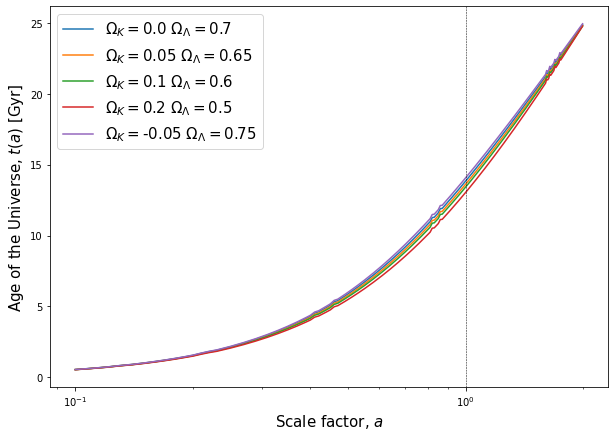

In [11]:
plt.figure(figsize = (10,7))
for i in range(len(Omega_k0)):
    plt.plot(a_arr, age_simps[i]/1e9, label = '$\Omega_K = $' + str(Omega_k0[i]) + ' $\Omega_\Lambda = $'+ str(np.round(Omega_L0[i], 2)))

plt.xscale('log')
plt.yscale('linear')

plt.axvline(1, color = 'k', linewidth = 0.5, ls = '--')

plt.xlabel('Scale factor, $a$', fontsize = 15)
plt.ylabel('Age of the Universe, $t(a)$ [Gyr]', fontsize = 15)

plt.legend(fontsize = 15)

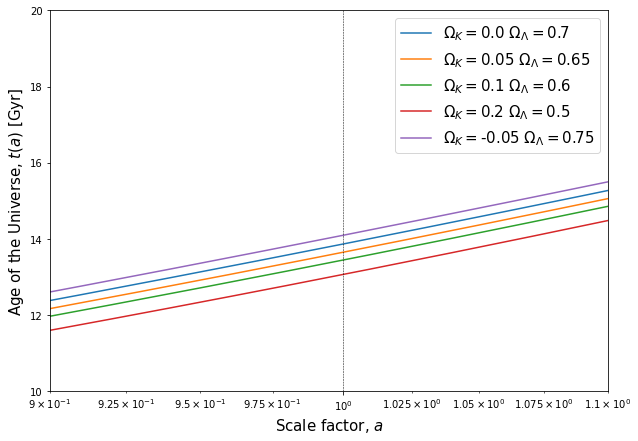

In [12]:
plt.figure(figsize = (10,7))
for i in range(len(Omega_k0)):
    plt.plot(a_arr, age_simps[i]/1e9, label = '$\Omega_K = $' + str(Omega_k0[i]) + ' $\Omega_\Lambda = $'+ str(np.round(Omega_L0[i], 2)))

plt.xscale('log')
plt.yscale('linear')

plt.axvline(1, color = 'k', linewidth = 0.5, ls = '--')

plt.xlim(0.9, 1.1)
plt.ylim(10, 20)


plt.xlabel('Scale factor, $a$', fontsize = 15)
plt.ylabel('Age of the Universe, $t(a)$ [Gyr]', fontsize = 15)

plt.legend(fontsize = 15)

In [13]:
import sys

In [14]:
def bisection(func,a,b,tol):
    
    # Finds a solution of func(x) = 0, via
    # bisection method
    # a and b are the boundaries of the search interval [a,b]
    # tol is the tolerance
    
    if (a > b):
        a,b = b,a
  
    x1 = a
    x2 = b
    f1 = func(x1)
    f2 = func(x2)
    
    if (f1/f2 > 0.):
        sys.exit('f(x) does not have opposite signs at the boundaries')
    else:  
        while (abs(x1-x2) > tol):
            x3 = (x1 + x2)/2.0
            f3 = func(x3)
            if (f3/f1 < 0.):
                x2 = x3
            else:
                x1 = x3
                
    return ((x1+x2)/2.0)

### Assuming a flat Universe ($\Omega_k = 0$, such that $\Omega_\Lambda = 1 - \Omega_m$) let's find what is the value of $\Omega_m$ given that the observed age of the Universe is $t_{Universe} = 13.8$ Gyr

In [15]:

def func_0(Omega_M):
    real_age = 13.8*1e9
    return age_Universe_simpson(1., 1000, Omega_M,  0. ,  1 - Omega_M) - real_age

In [16]:
bisection(func_0,0.2,0.5,0.01)

0.3171875

##### We find that $\Omega_m = 0.317875$, in agreement with the findings of the Planck satellite $\Omega_m = 0.315 \pm 0.007$(see arXiv:1807.06209)

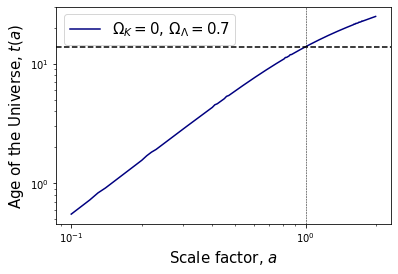

In [18]:
plt.plot(a_arr, age_simps_0/1e9, color = 'navy', label = '$\Omega_K = 0$, $\Omega_\Lambda = 0.7$')

plt.axhline(13.8, color = 'k', ls = '--')
plt.axvline(1, color = 'k', linewidth = 0.5, ls = '--')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Scale factor, $a$', fontsize = 15)
plt.ylabel('Age of the Universe, $t(a)$', fontsize = 15)

plt.legend(fontsize = 15)